<a href="https://colab.research.google.com/github/bhanupriya9916/bhanu121998/blob/main/Assignments_3_simple_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf

In [47]:
# import dataset
dataset=pd.read_csv('/content/delivery_time.csv')
dataset

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [48]:
#EDA and Data Visualization
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


<ipython-input-49-ea2f6099b8bf>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['Delivery Time'])


<Axes: xlabel='Delivery Time', ylabel='Density'>

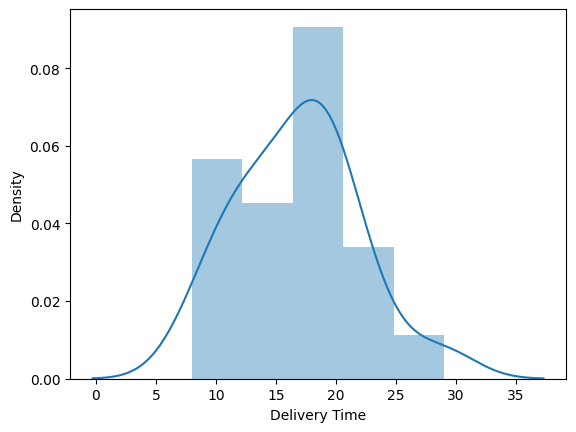

In [49]:
sns.distplot(dataset['Delivery Time'])

<ipython-input-50-87e4431da1bd>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['Sorting Time'])


<Axes: xlabel='Sorting Time', ylabel='Density'>

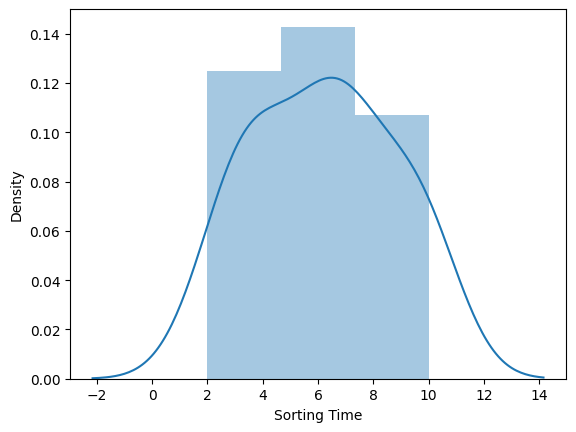

In [50]:
sns.distplot(dataset['Sorting Time'])

In [51]:
#Feature Engineering
# Renaming Columns
dataset=dataset.rename({'Delivery Time':'delivery_time', 'Sorting Time':'sorting_time'},axis=1)
dataset

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [52]:
#Correlation Analysis
dataset.corr()

,delivery_time,sorting_time
delivery_time,1.000000,0.825997
sorting_time,0.825997,1.000000


<Axes: xlabel='sorting_time', ylabel='delivery_time'>

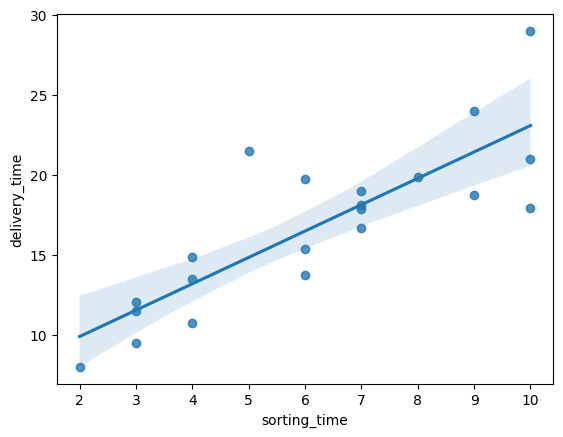

In [53]:
sns.regplot(x=dataset['sorting_time'],y=dataset['delivery_time'])

In [54]:
#Model Building
model=smf.ols("delivery_time~sorting_time",data=dataset).fit()

In [55]:
#Model Testing
# Finding Coefficient parameters
model.params

Intercept       6.582734
sorting_time    1.649020
dtype: float64

In [56]:
# Finding tvalues and pvalues
model.tvalues , model.pvalues

(Intercept       3.823349
 sorting_time    6.387447
 dtype: float64,
 Intercept       0.001147
 sorting_time    0.000004
 dtype: float64)

In [57]:
# Finding Rsquared Values
model.rsquared , model.rsquared_adj

(0.6822714748417231, 0.6655489208860244)

In [58]:
#Model Predictions
# Manual prediction for say sorting time 5
delivery_time = (6.582734) + (1.649020)*(5)
delivery_time

14.827834

In [59]:
# Automatic Prediction for say sorting time 5, 8
new_data=pd.Series([5,8])
new_data

0    5
1    8
dtype: int64

In [60]:
data_pred=pd.DataFrame(new_data,columns=['sorting_time'])
data_pred

,sorting_time
0,5
1,8


In [61]:
model.predict(data_pred)

0    14.827833
1    19.774893
dtype: float64

Text(0.5, 1.0, 'Log-Transformed Data')

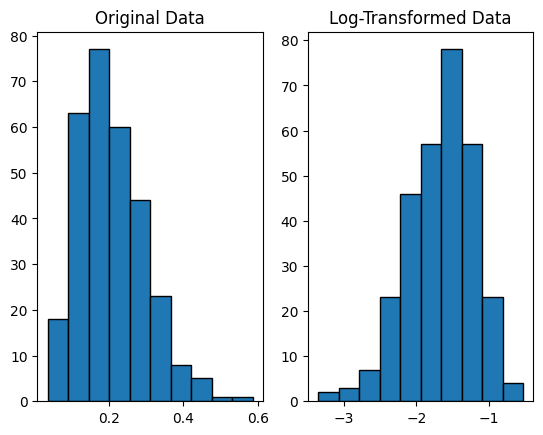

In [62]:
np.random.seed(0)
#create beta distributed random variable with 200 values
dataset = np.random.beta(a=4, b=15, size=300)
dataset_log = np.log(dataset)
#define grid of plots
fig, axs = plt.subplots(nrows=1, ncols=2)
#create histograms
axs[0].hist(dataset, edgecolor='black')
axs[1].hist(dataset_log, edgecolor='black')
#add title to each histogram
axs[0].set_title('Original Data')
axs[1].set_title('Log-Transformed Data')

Text(0.5, 1.0, 'Square Root Transformed Data')

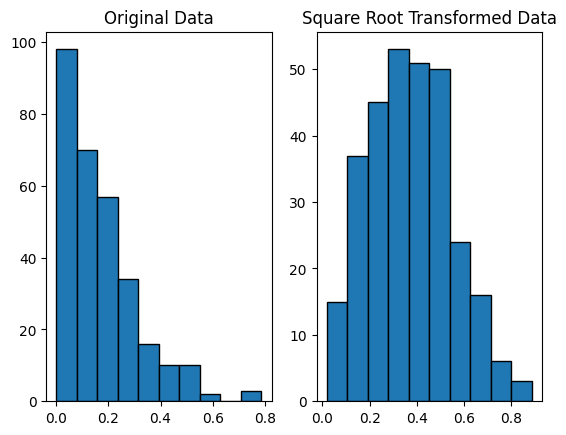

In [63]:
np.random.seed(0)
#create beta distributed random variable with 200 values
dataset = np.random.beta(a=1, b=5, size=300)
dataset_log = np.sqrt(dataset)
#define grid of plots
fig, axs = plt.subplots(nrows=1, ncols=2)
#create histograms
axs[0].hist(dataset, edgecolor='black')
axs[1].hist(dataset_log, edgecolor='black')
#add title to each histogram
axs[0].set_title('Original Data')
axs[1].set_title('Square Root Transformed Data')

In [64]:
#SIMPLE LINEAR REGRESSION FOR SALARY DATA

In [65]:
dataset=pd.read_csv('/content/Salary_Data.csv')
dataset

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [66]:
#EDA and Data Visualization
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


<ipython-input-67-c16c18e1f77c>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['YearsExperience'])


<Axes: xlabel='YearsExperience', ylabel='Density'>

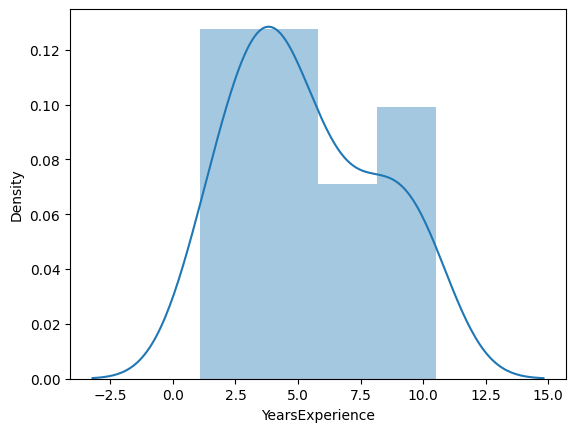

In [67]:
sns.distplot(dataset['YearsExperience'])

<ipython-input-68-9fd6134c9331>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['Salary'])


<Axes: xlabel='Salary', ylabel='Density'>

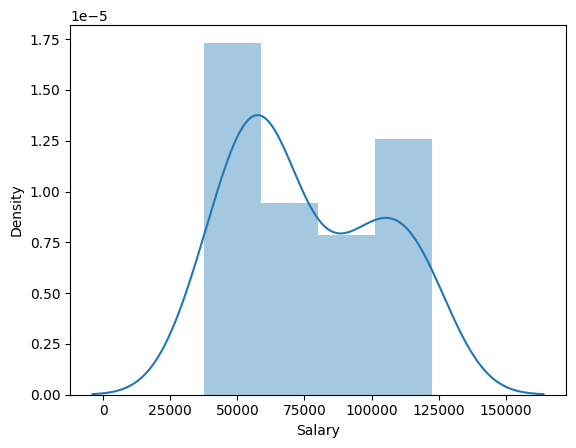

In [68]:
sns.distplot(dataset['Salary'])

In [69]:
# CORRELATION ANALYSIS
dataset.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


<Axes: xlabel='YearsExperience', ylabel='Salary'>

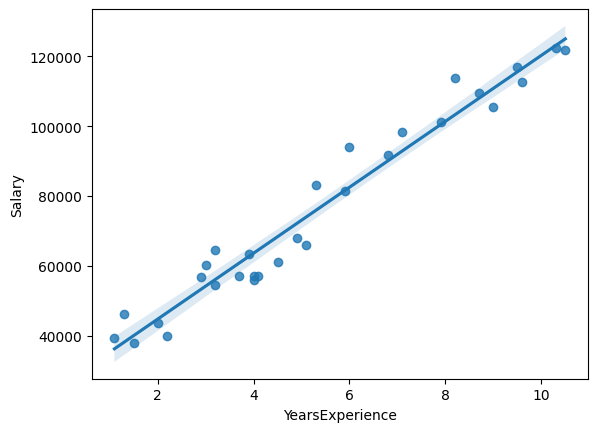

In [70]:
sns.regplot(x=dataset['YearsExperience'],y=dataset['Salary'])

In [71]:
#MODEL BUILDING
model=smf.ols("Salary~YearsExperience",data=dataset).fit()

In [72]:
#MODEL TESTING
# Finding Cefficient Parameters
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [73]:
# Finding Pvalues and tvalues
model.tvalues, model.pvalues

(Intercept          11.346940
 YearsExperience    24.950094
 dtype: float64,
 Intercept          5.511950e-12
 YearsExperience    1.143068e-20
 dtype: float64)

In [74]:
# Finding Rsquared values
model.rsquared , model.rsquared_adj

(0.9569566641435086, 0.9554194021486339)

In [75]:
#MODEL PREDICTIONS
# Manual prediction for say 3 Years Experience
Salary = (25792.200199) + (9449.962321)*(3)
Salary

54142.087162

In [76]:
# Automatic Prediction for say 3 & 5 Years Experience 
new_data=pd.Series([3,5])
new_data

0    3
1    5
dtype: int64

In [77]:
data_pred=pd.DataFrame(new_data,columns=['YearsExperience'])
data_pred

,YearsExperience
0,3
1,5


In [78]:
model.predict(data_pred)

0    54142.087163
1    73042.011806
dtype: float64

Text(0.5, 1.0, 'Log-Transformed Data')

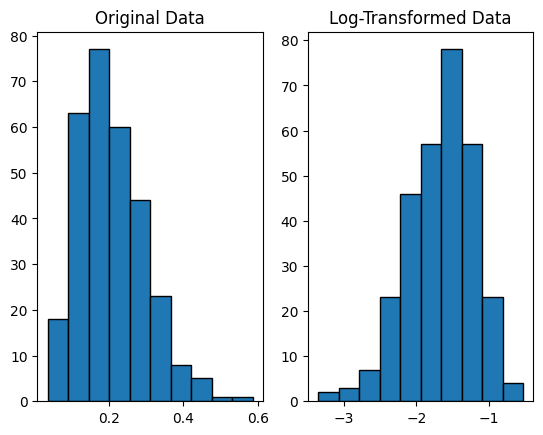

In [79]:
np.random.seed(0)
#create beta distributed random variable with 200 values
dataset = np.random.beta(a=4, b=15, size=300)
dataset_log = np.log(dataset)
#define grid of plots
fig, axs = plt.subplots(nrows=1, ncols=2)
#create histograms
axs[0].hist(dataset, edgecolor='black')
axs[1].hist(dataset_log, edgecolor='black')
#add title to each histogram
axs[0].set_title('Original Data')
axs[1].set_title('Log-Transformed Data')

Text(0.5, 1.0, 'Square Root Transformed Data')

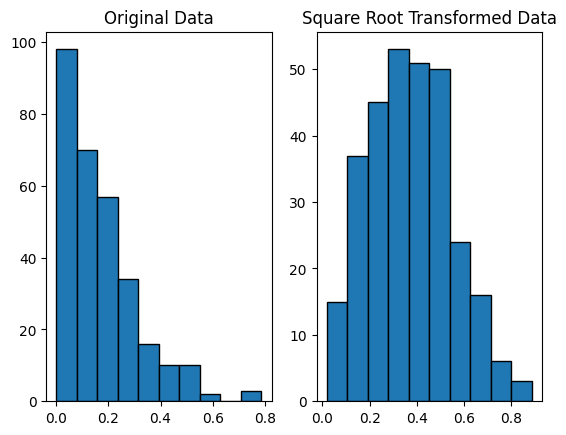

In [80]:
np.random.seed(0)
#create beta distributed random variable with 200 values
dataset = np.random.beta(a=1, b=5, size=300)
dataset_log = np.sqrt(dataset)
#define grid of plots
fig, axs = plt.subplots(nrows=1, ncols=2)
#create histograms
axs[0].hist(dataset, edgecolor='black')
axs[1].hist(dataset_log, edgecolor='black')
#add title to each histogram
axs[0].set_title('Original Data')
axs[1].set_title('Square Root Transformed Data')